In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_loss	val_loss	test_auc	test_avg_pre

In [3]:
key = 'train_loss'
nd = pd.DataFrame()
for seed in range(43, 53):
    data = pd.read_csv(f'data/result/pyg/Random_feat_{seed}.csv')
    nd[seed] = data[key]
nd['mean'] = nd.mean(axis=1)
nd['max'] = nd.max(axis=1)
nd['min'] = nd.min(axis=1)

key = 'val_loss'
nd1 = pd.DataFrame()
for seed in range(43, 53):
    data = pd.read_csv(f'data/result/pyg/Random_feat_{seed}.csv')
    nd1[seed] = data[key]
nd1['mean'] = nd1.mean(axis=1)
nd1['max'] = nd1.max(axis=1)
nd1['min'] = nd1.min(axis=1)

key = 'test_auc'
nd2 = pd.DataFrame()
for seed in range(43, 53):
    data = pd.read_csv(f'data/result/pyg/Random_feat_{seed}.csv')
    nd2[seed] = data[key]
nd2['mean'] = nd2.mean(axis=1)
nd2['max'] = nd2.max(axis=1)
nd2['min'] = nd2.min(axis=1)

key = 'test_avg_pre'
nd3 = pd.DataFrame()
for seed in range(43, 53):
    data = pd.read_csv(f'data/result/pyg/Random_feat_{seed}.csv')
    nd3[seed] = data[key]
nd3['mean'] = nd3.mean(axis=1)
nd3['max'] = nd3.max(axis=1)
nd3['min'] = nd3.min(axis=1)

In [4]:
def smooth(data: pd.Series):
    smooth_data = data.ewm(alpha=0.2).mean()
    return smooth_data

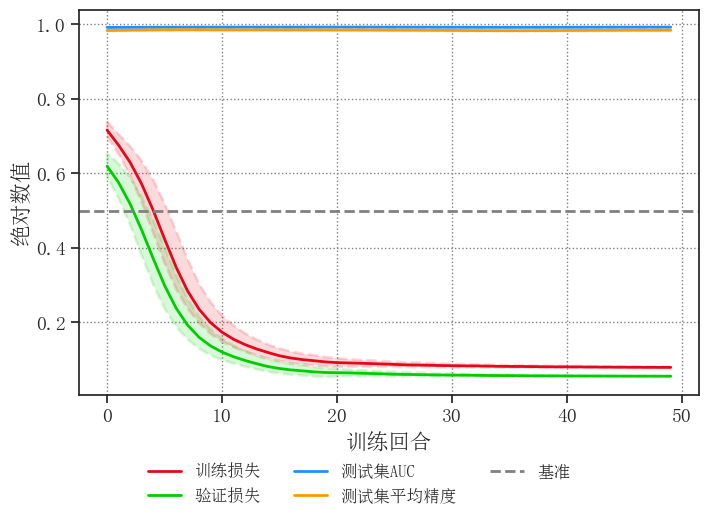

In [6]:
colors = ['#e5071a', '#00CD00', '#1e90ff', '#FF9900', '#fd79a8', '#8074b2', '#636e72']

plt.figure(figsize=(8, 5))
ax = sns.set_theme(style='ticks', font_scale=1.3)
config = {
    "font.family":'serif',
    "font.size": 18,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
plt.rcParams.update(config)

plt.grid(ls=':', color='grey', lw=1)
plt.xlabel('训练回合')  # x轴标签
plt.ylabel('绝对数值')  # y轴标签
# plt.ylim((6, 11))  # 调整y轴范围，建议先不写，先画默认图，再手动调整
# plt.xlim((0, 200))  # 调整x轴范围，同上
y = nd['mean']
min_y = nd['min']
max_y = nd['max']
x = range(len(y))
plt.fill_between(x, smooth(min_y), smooth(max_y), alpha=0.15, linestyle='--', color='#e5071a', lw=2)  # 填充极大极小值
sns.lineplot(x=x, y=smooth(y), lw=2, color='#e5071a', label='训练损失')

y = nd1['mean']
min_y = nd1['min']
max_y = nd1['max']
x = range(len(y))
plt.fill_between(x, smooth(min_y), smooth(max_y), alpha=0.15, linestyle='--', color='#00CD00', lw=2)  # 填充极大极小值
sns.lineplot(x=x, y=smooth(y), lw=2, color='#00CD00', label='验证损失')

y = nd2['mean']
min_y = nd2['min']
max_y = nd2['max']
x = range(len(y))
plt.fill_between(x, smooth(min_y), smooth(max_y), alpha=0.15, linestyle='--', color='#1e90ff', lw=2)  # 填充极大极小值
sns.lineplot(x=x, y=smooth(y), lw=2, color='#1e90ff', label='测试集AUC')

y = nd3['mean']
min_y = nd3['min']
max_y = nd3['max']
x = range(len(y))
plt.fill_between(x, smooth(min_y), smooth(max_y), alpha=0.15, linestyle='--', color='#FF9900', lw=2)  # 填充极大极小值
sns.lineplot(x=x, y=smooth(y), lw=2, color='#FF9900', label='测试集平均精度')


plt.axhline(y=0.5, color='gray', linestyle='--', label='基准', lw=2)
plt.legend(loc=(0.1, -0.3), ncol=3, fontsize=12, frameon=False)
plt.savefig('image/final_figure.pdf', bbox_inches='tight')